Looking at data from runs on Feb 12-13 night

generated weights, tract lengths and conduction velocity, 10 nodes) but with constant weights and trying to find conduction velocity for two diff networks

doing for random init conditions and also constant

version 3 - cv = 2000mm/s
version 4- cv = 10000mm/s



In [1]:
import sys
import glob
import numpy as np
import seaborn as sns


OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

Quick Look

/gpfs/fs0/scratch/l/lfefebvr/noorir/model/helper_functions.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/traitlets/config/application.py", line 658, i

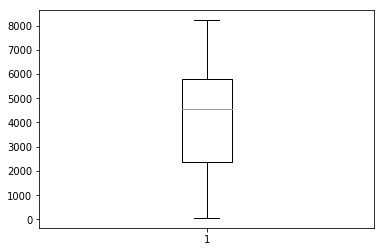

In [2]:
import helper_functions as hf
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

thing = np.load("/scratch/l/lfefebvr/noorir/model/Output/2019-02-14/948883/rank73_0.009740617562225645.npy")
plt.boxplot(thing)
plt.show()

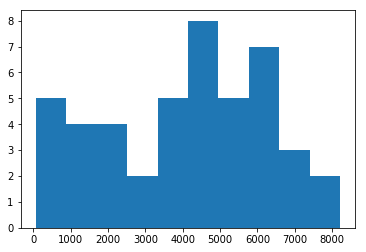

In [3]:
plt.hist(thing)
plt.show()

We don't see narrow histogram so try to see if there's a difference between conduc vel all 2000 vs all 8000

Extra Helper Functions

In [6]:
def plot_ts(nodes, all_ts):


    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])

    plt.show()

Choosing which jobs to analyze

In [7]:
# CHANGE THIS CELL ACCORDING TO DATA YOU ARE ANALYZING
"""

"""
NTASKS =
JOB= 
NUM_JOBS = len(JOB)

Loading all the data we need for analysis

In [ ]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")
    if len(var) ==1:
        load_files[job] = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

In [ ]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) == NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res)
    else:
        print("Error", job)
        print(full_list)
        break

# STARTING ANALYSIS

Plotting all histograms of all the conduction vel / weights estimates

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15.0,15.0))
for i in range(NUM_JOBS): 
    plt.subplot(3, 3, i+1)


    print(i+1, "JOB #: ", JOB[i], "min: {} max: {} avg: {}".format(np.min(all_res[JOB[i]]), 
                                                                   np.max(all_res[JOB[i]]), np.average(all_res[JOB[i]])))
    plt.hist(all_res[JOB[i]], range= (2000,8000))
    #row major counting


In [11]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure

top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

Looking at solution matrices

In [ ]:
# ALL THE RESULTS AT ONCE

for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    ind = 0
    mat = np.ones((nodes, nodes))
    for row in range(0,nodes):
        for col in range(row+1, nodes):
            mat[row,col] = all_res[JOB[i]][ind]
            mat[col,row] = all_res[JOB[i]][ind]
            ind += 1
    np.fill_diagonal(mat,0)
    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(all_res[JOB[i]]), np.min(all_res[JOB[i]])))
    plt.figure()
    sns.heatmap(mat, vmax = 8000, vmin = 2000, cmap = "viridis")

In [ ]:
"""
    if plot == "corr":
        np.fill_diagonal(exp_data, 0)
        plot_mat(exp_data,"opt corr", 1, -1)
        print("MSE", res)
    if plot == "delay":
        plot_mat(delays,"Delays")
    if plot == "cw":
        if optim =="c":
            plot_mat(cmat, "opt c",  0.0005, 0)
        if optim =="w":
            plot_mat(wmat, "opt w", 0, 1)
"""
for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    
    if evol_params['optim'] =='w':
        MAT = c_mat
    elif evol_params['optim'] =='c':
        MAT = w_mat
    hf.residuals_cw_corr(all_res[JOB[i]], wc_params, targ_data, nodes, tract_mat, MAT, skip, 
                         wc_seed, evol_params['optim'],plot = "delay")

    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(all_res[JOB[i]]), np.min(all_res[JOB[i]])))